In [116]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 19}

matplotlib.rc('font', **font)


In [126]:
merged=pd.read_csv("UsedData/Merged_ratings_movies_revenue.csv")
def initialClean(dataset):
    subSet = dataset
    subSet = subSet.loc[subSet['revenue']>0,:].loc[(subSet['budget']>100),:].loc[(subSet['title']!="The Tiger: An Old Hunter's Tale")].loc[(subSet.profit!=0),:].loc[subSet.date>=2010]
    subSet['ROI']=np.array(subSet.profit)/np.array(subSet.budget)
    subSet.sort_values('ROI',ascending=False,inplace=True)
    return subSet
    

def getGenreSet(dataset, genre):
    return dataset.loc[dataset[genre]==1]
    
    
    
def getPosNegSubset(dataset,x=[1,-1]):
    if (x==1):
        return dataset.loc[dataset.ROI>=0]
    elif (x==(-1)):
        return dataset.sort_values('ROI',ascending=False).loc[dataset.ROI<0]
        
        
def plotHists(dataframes, column, titles):
    for i,dataframe in enumerate(dataframes):
        plt.subplot((len(dataframes)/2 + len(dataframes)%2),2,i+1)
        color = 'darkgreen'
        if i%2==1:
            color = 'darkred'
        n, bins, patches=plt.hist(dataframe[column],int(dataframe[column].describe()[0]/10),(dataframe[column].min(),dataframe[column].mean()+dataframe[column].std()+.5),color=color)
        y = np.linspace(0,max(n),50)
        xmean = np.full((50,1),dataframe[column].mean())
        xStdLow = np.full((50,1),dataframe[column].mean()-dataframe[column].std())
        xStdHigh = np.full((50,1),dataframe[column].mean()+dataframe[column].std())
        plt.plot(xmean,y, label="Mean")
        plt.plot(xStdLow,y,ls='--',color='lightblue',label="Upper, Lower Stdev")
        plt.plot(xStdHigh,y,ls='--',color='lightblue')
        plt.title(titles[i])
        plt.xlabel('Return on Investment')
        plt.ylabel('Frequency (# of movies)')
        plt.legend(loc=1)
        print(len(bins))
        freq = 1
        if len(bins)>60:
            freq = 3
        ticks = plt.xticks(np.arange(int(min(bins)), int(max(bins))+1, freq))

In [84]:
merged = initialClean(merged)
merged

,movieId,title,date,Comedy,Romance,Drama,Children,Crime,Mystery,Action,...,imdb_id,revenue,adult,overview,budget,profit,genre,AvgRating,NumInteractions,ROI
2190,138610,The Gallows,2015,0,0,0,0,0,0,0,...,tt2309260,42664410.0,False,20 years after a horrific accident during a sm...,100000.0,42564410.0,Horror,2.406250,80,425.644100
168,168610,A Ghost Story,2017,0,0,1,0,0,0,0,...,tt6265828,15584255.0,False,"Recently deceased, a white-sheeted ghost retur...",100000.0,15484255.0,Drama,3.546005,413,154.842550
9207,80862,Catfish,2010,0,0,0,0,0,1,0,...,tt1584016,3045943.0,False,"Nev, a 24-year-old New York-based photographer...",30000.0,3015943.0,Documentary,3.440870,575,100.531433
4625,148070,Mary Kom,2014,0,0,1,0,0,0,0,...,tt3001638,15536328.0,False,A chronicle of the life of Indian boxer 'Mary ...,224056.0,15312272.0,Drama,3.272727,11,68.341272
9496,85788,Insidious,2010,0,0,0,0,0,0,0,...,tt1591095,97009150.0,False,A family discovers that dark spirits have inva...,1500000.0,95509150.0,Horror,3.430758,1993,63.672767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,158607,Skinning,2010,0,0,1,0,1,0,1,...,tt1129437,198.0,False,Novica is a mathematics champion in a Belgrade...,500000.0,-499802.0,Action,3.166667,6,-0.999604
6865,167478,The Guillotines,2012,0,0,1,0,0,0,1,...,tt1847713,5290.0,False,"During the Manchurian-ruled Qing Dynasty, Empe...",15000000.0,-14994710.0,Action,3.300000,5,-0.999647
113,170751,Aftermath,2017,0,0,1,0,0,0,0,...,tt4581576,3451.0,False,A fatal plane crash changes the lives of Roman...,10500000.0,-10496549.0,Drama,2.886364,66,-0.999671
4635,146072,Duniyadari,2014,0,0,0,0,0,0,0,...,tt3121604,3.0,False,Duniyadari (Marathi: दुनियादारी) is a 2013 Mar...,390000.0,-389997.0,NaN,3.166667,3,-0.999992


# Compiling subsets for plotting

In [85]:
action_df = getGenreSet(merged,'Action')
adventure_df = getGenreSet(merged,'Adventure')
drama_df = getGenreSet(merged,'Drama')
animation_df = getGenreSet(merged,'Animation')
posROI_df = getPosNegSubset(merged,x=1)
negROI_df = getPosNegSubset(merged,x=-1)

35
57
21
9
89
34


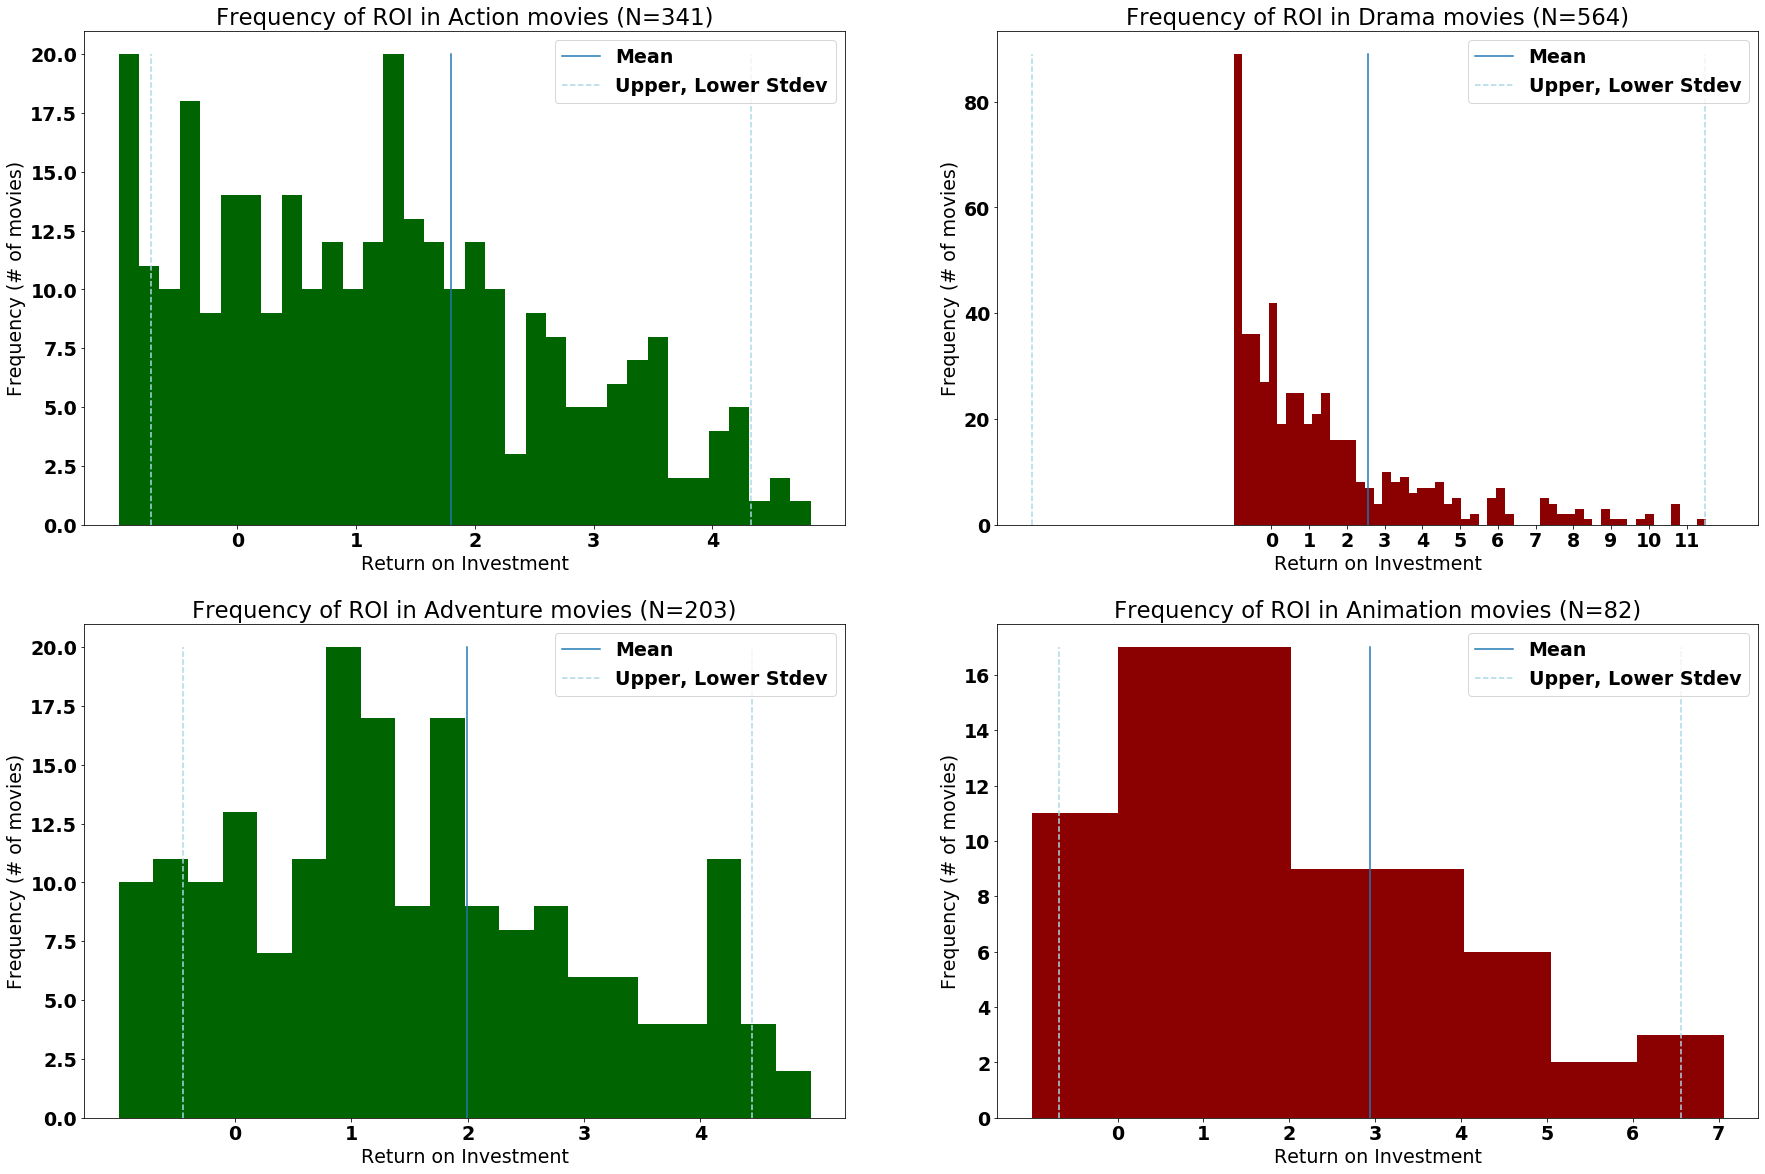

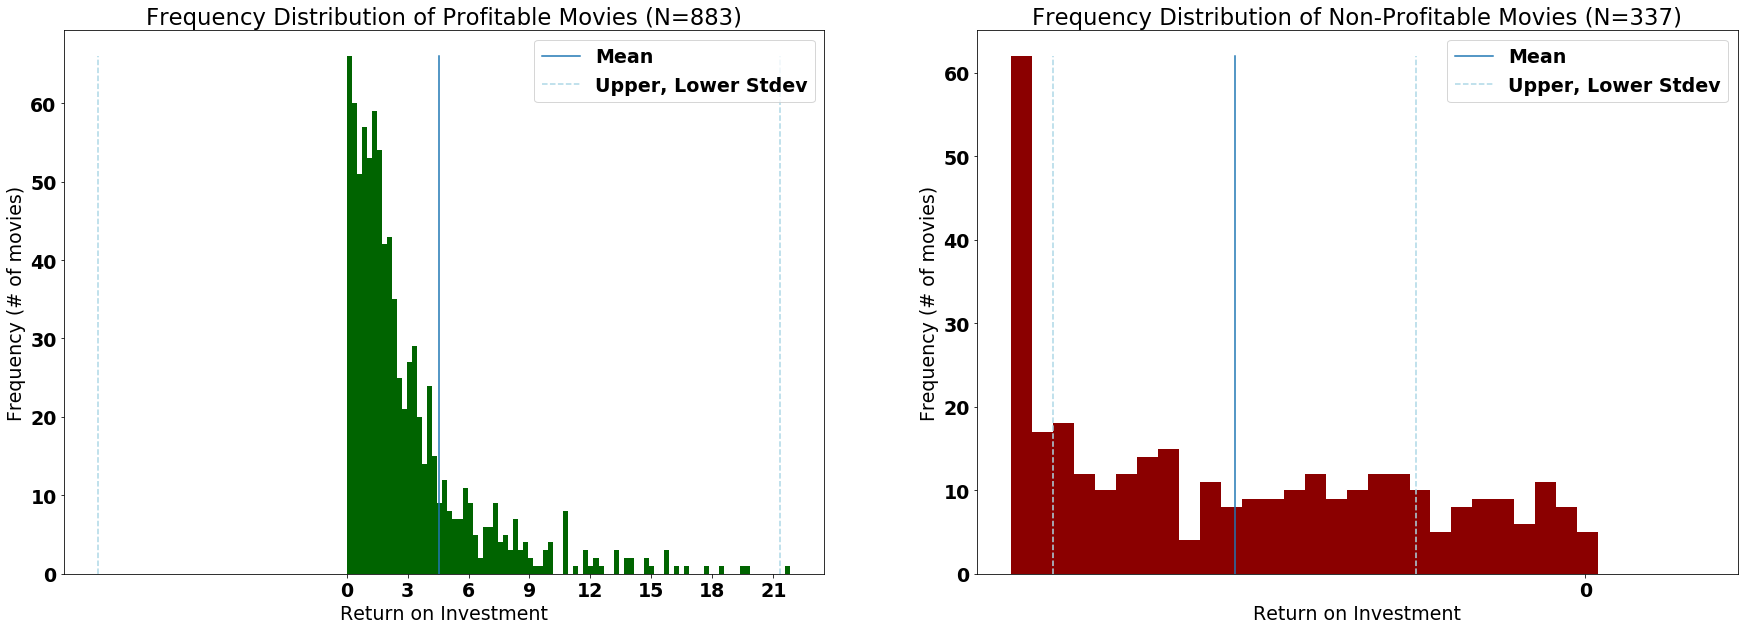

In [127]:
genrelist = [action_df,drama_df,adventure_df,animation_df]
titles = ['Frequency of ROI in Action movies (N='+ str(len(genrelist[0].ROI))+')',
         'Frequency of ROI in Drama movies (N='+ str(len(genrelist[1].ROI))+')',
         'Frequency of ROI in Adventure movies (N='+ str(len(genrelist[2].ROI))+')',
         'Frequency of ROI in Animation movies (N='+ str(len(genrelist[3].ROI))+')',]
figHist = plt.figure(figsize=(30,20))
plotHists(genrelist,'ROI',titles)
figHist.savefig('mwangPlotImages/genreHistogram.png')
titles = ['Frequency Distribution of Profitable Movies (N='+ str(len(posROI_df.ROI))+')',
         'Frequency Distribution of Non-Profitable Movies (N='+ str(len(negROI_df.ROI))+')']
figPosNegHist = plt.figure(figsize=(30,10))
plotHists([posROI_df,negROI_df],'ROI',titles)
figPosNegHist.savefig('mwangPlotImages/PosNegHist.png')

In [82]:
print('POSITIVE \n' + str(posROI_df.ROI.describe())+'\n')
print('NEGATIVE \n' + str(negROI_df.ROI.describe()))

POSITIVE 
count    883.000000
mean       4.543251
std       16.777395
min        0.000869
25%        0.926366
50%        1.967557
75%        4.031789
max      425.644100
Name: ROI, dtype: float64

NEGATIVE 
count    337.000000
mean      -0.611149
std        0.315859
min       -0.999996
25%       -0.916972
50%       -0.655641
75%       -0.345455
max       -0.000355
Name: ROI, dtype: float64


# Creating a scatter of Revenue vs budget of Action movies in last 10 years

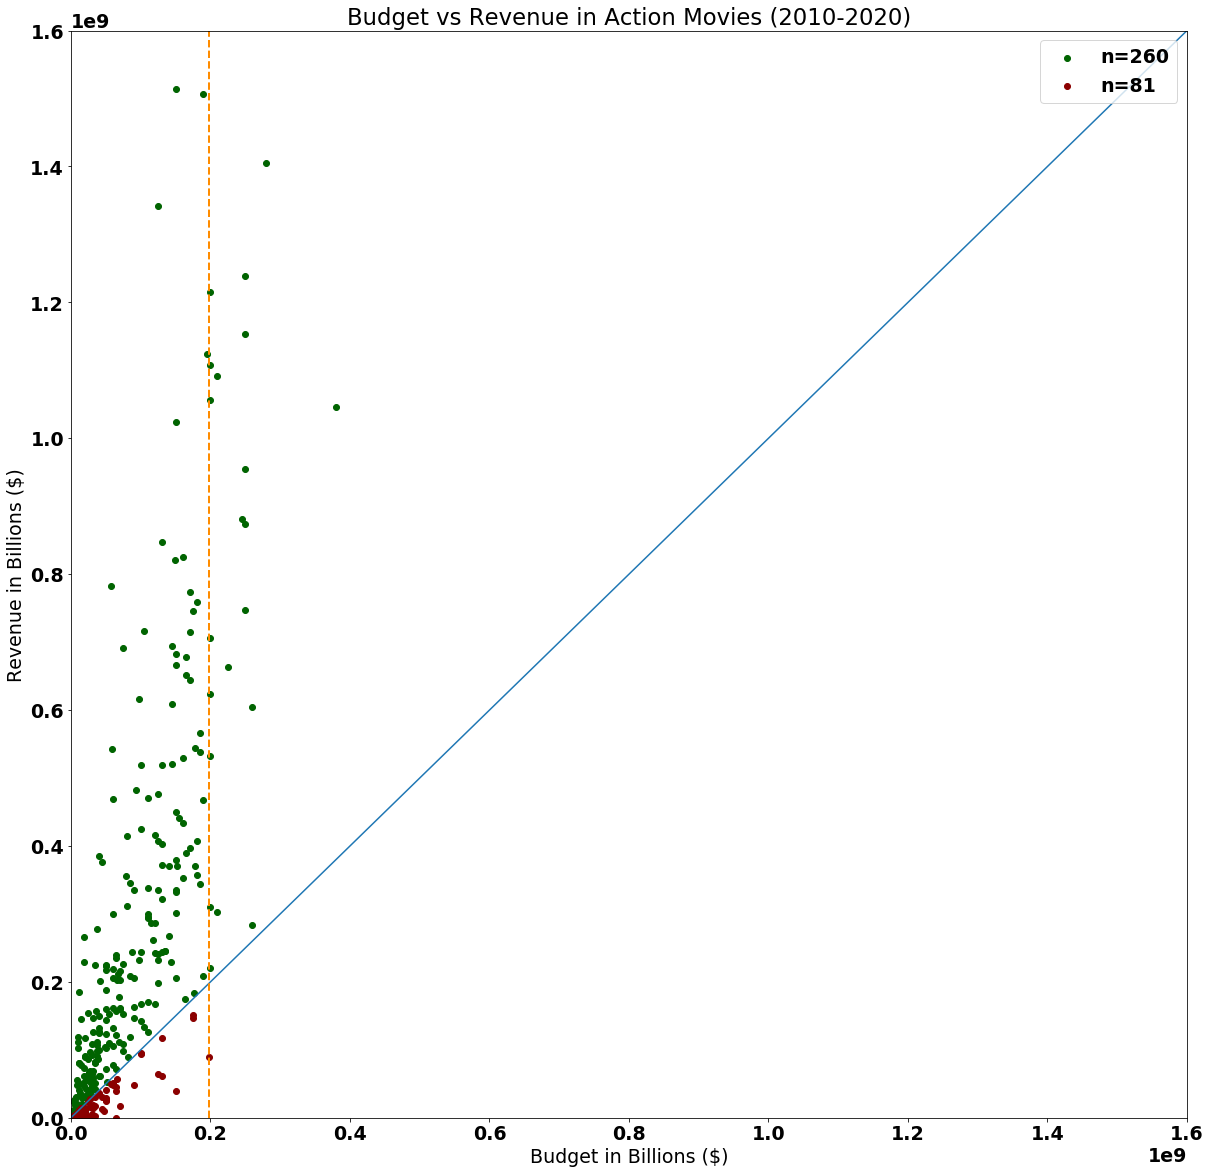

In [130]:
figScatter = plt.figure(figsize=(20,20))
actionsub_df = action_df.loc[action_df.ROI>=0]
plt.scatter(actionsub_df.budget,actionsub_df.revenue,color='darkgreen',label='n='+str(actionsub_df.shape[0]))
actionsub_df = action_df.loc[action_df.ROI<0]
plt.scatter(actionsub_df.budget,actionsub_df.revenue,color='darkred',label='n='+ str(actionsub_df.shape[0]))
plt.plot(np.linspace(0,1.6e9),np.linspace(0,1.6e9))
plt.xlim(0,1.6e9)
plt.ylim(0,1.6e9)
plt.plot(np.linspace(actionsub_df.budget.max(),actionsub_df.budget.max(),500),np.linspace(0,1.6e9,500), color='darkorange',ls='--',lw=2)
plt.title('Budget vs Revenue in Action Movies (2010-2020)')
plt.xlabel('Budget in Billions ($)')
plt.ylabel('Revenue in Billions ($)')
plt.legend(loc=1)
figScatter.savefig('mwangPlotImages/ActionScatter.png')







# Seeing how it compares against animation

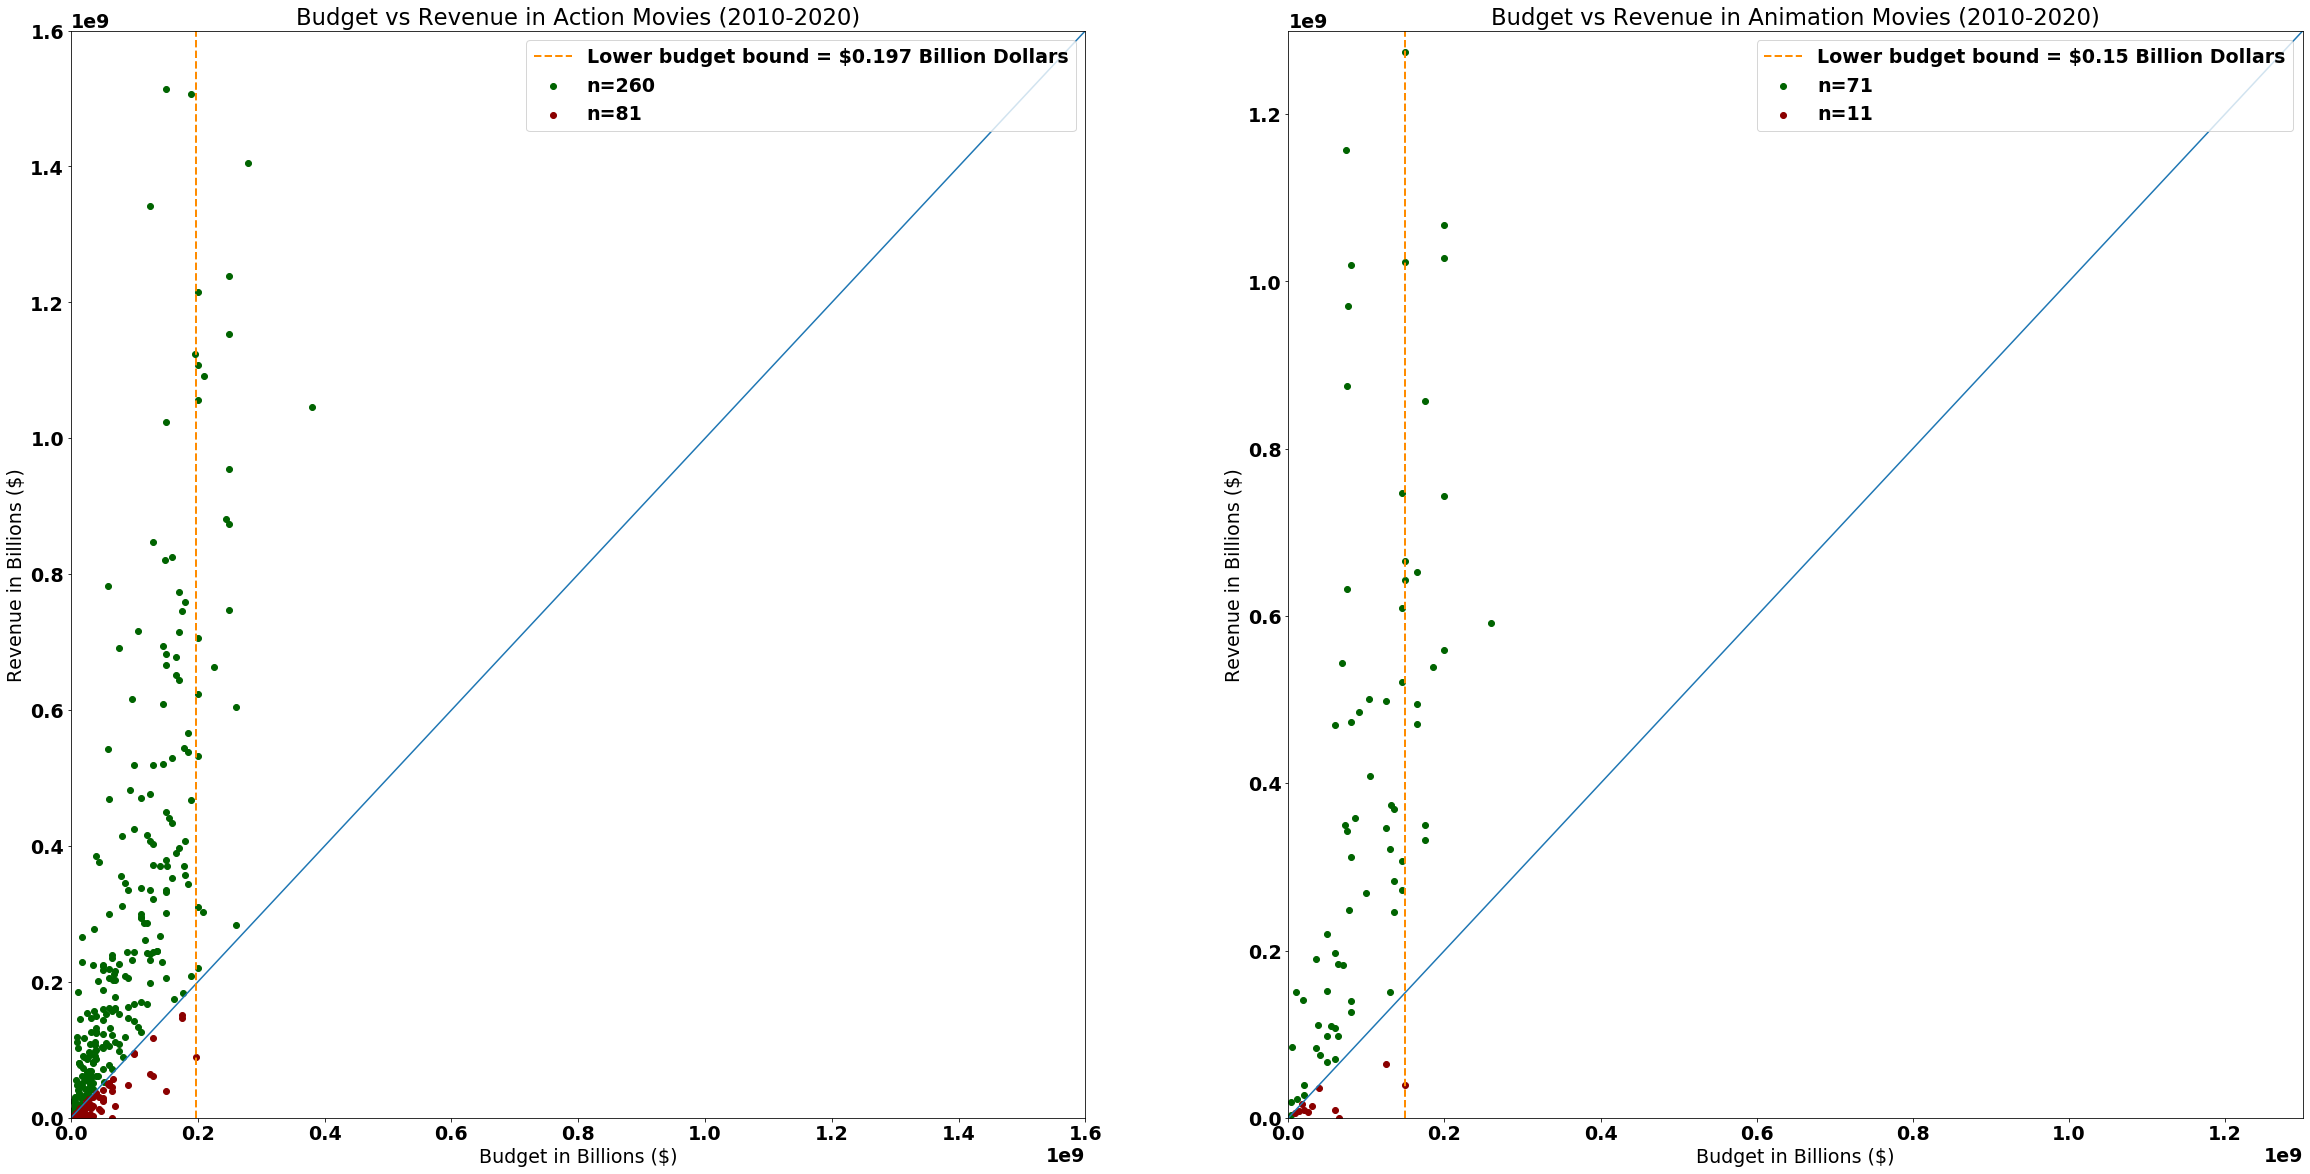

In [147]:
figActionAnimation = plt.figure(figsize=(40,20))
plt.subplot(1,2,1)
actionsub_df = action_df.loc[action_df.ROI>=0]
plt.scatter(actionsub_df.budget,actionsub_df.revenue,color='darkgreen',label='n='+str(actionsub_df.shape[0]))
actionsub_df = action_df.loc[action_df.ROI<0]
plt.scatter(actionsub_df.budget,actionsub_df.revenue,color='darkred',label='n='+ str(actionsub_df.shape[0]))
plt.plot(np.linspace(0,1.6e9),np.linspace(0,1.6e9))
plt.xlim(0,1.6e9)
plt.ylim(0,1.6e9)
plt.plot(np.linspace(actionsub_df.budget.max(),actionsub_df.budget.max(),500),np.linspace(0,1.6e9,500), color='darkorange',ls='--',lw=2,label='Lower budget bound = $'+str(round(actionsub_df.budget.max()/1e9,3)) +" Billion Dollars")
plt.title('Budget vs Revenue in Action Movies (2010-2020)')
plt.xlabel('Budget in Billions ($)')
plt.ylabel('Revenue in Billions ($)')
plt.legend(loc=1)

#Second subplot
plt.subplot(1,2,2)
plt.xlim(0,1.3e9)
plt.ylim(0,1.3e9)
animationsub_df = animation_df.loc[animation_df.ROI>=0]
plt.scatter(animationsub_df.budget,animationsub_df.revenue,color='darkgreen',label='n='+str(animationsub_df.shape[0]))
animationsub_df = animation_df.loc[animation_df.ROI<0]
plt.scatter(animationsub_df.budget,animationsub_df.revenue,color='darkred',label='n='+ str(animationsub_df.shape[0]))
plt.plot(np.linspace(0,1.3e9),np.linspace(0,1.3e9))
plt.plot(np.linspace(animationsub_df.budget.max(),animationsub_df.budget.max(),500),np.linspace(0,1.3e9,500), color='darkorange',ls='--',lw=2,label='Lower budget bound = $'+str(animationsub_df.budget.max()/1e9) +" Billion Dollars")
plt.title('Budget vs Revenue in Animation Movies (2010-2020)')
plt.xlabel('Budget in Billions ($)')
plt.ylabel('Revenue in Billions ($)')
plt.legend(loc=1)

figActionAnimation.savefig('mwangPlotImages/ActionAnimationScatter.png')